In [2]:
import os
import matplotlib.pyplot as plt
import pyFAI
from pyFAI.azimuthalIntegrator import AzimuthalIntegrator
import fabio
import numpy as np

In [3]:
# File paths
data_folder = './data'
mask_path = os.path.join(data_folder, 'saxs_mask_mrl.edf')
image_path = os.path.join(data_folder, 'saxs_ML_AgB_7000.0eV_0.5sec_12084.0mV.tif')


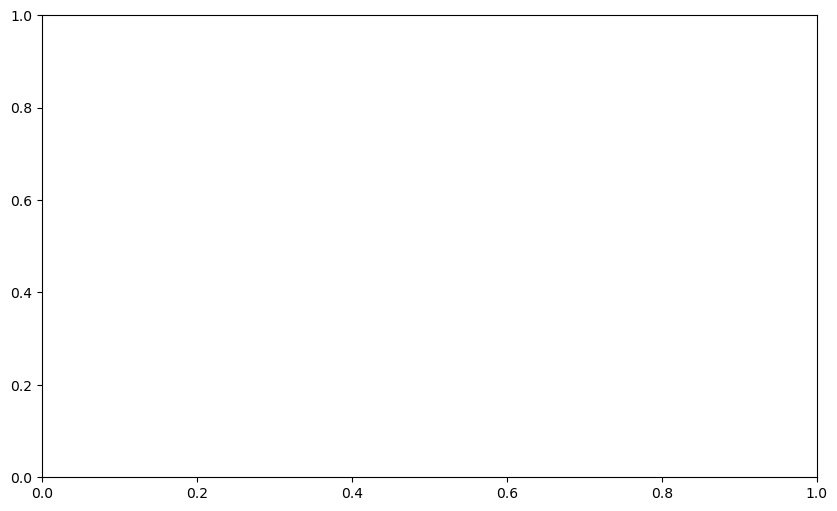

In [4]:
# Parameters
az_range = [-180, 180]
fig, ax = plt.subplots(figsize=(10, 6))

In [5]:
# Detector setup
dist = 0.49  # Sample-detector distance in meters
pixel_size = 0.000172  # Pixel size in meters
bc_y, bc_x = 500, 500  # Approximate beam center in pixels (update based on your data)
poni1 = bc_y * pixel_size
poni2 = bc_x * pixel_size

rot1, rot2, rot3 = 0, 0, 0  # Rotation parameters

In [6]:
# Define energy and calculate wavelength
energy = 7000  # Energy in eV
wavelength = ((4.1357 * 10**-15) * (2.9979 * 10**8)) / energy  # Wavelength in meters


In [7]:
# Calibrant and detector setup
#calibrant = pyFAI.calibrant.get_calibrant("AgBh")
#calibrant.wavelength = wavelength
detector = pyFAI.detectors.Pilatus1M(pixel1=pixel_size, pixel2=pixel_size, max_shape=(1043, 981))


In [8]:
# Azimuthal integrator
ai = AzimuthalIntegrator(
    dist=dist,
    detector=detector,
    wavelength=wavelength,
    poni1=poni1,
    poni2=poni2,
    rot1=rot1,
    rot2=rot2,
    rot3=rot3
)
ai.maskfile = mask_path

In [9]:
# Load and process image
im_data = fabio.open(image_path)
im_array = im_data.data
im_array[im_array < 1] = 1  # Avoid invalid values

In [10]:
# Perform radial integration
npt = 2000  # Number of points in radial integration
im_reduced = ai.integrate1d(im_array, npt=npt, azimuth_range=az_range)
qvector = im_reduced[0] / 10  # Convert to Å^-1
intensity = im_reduced[1]

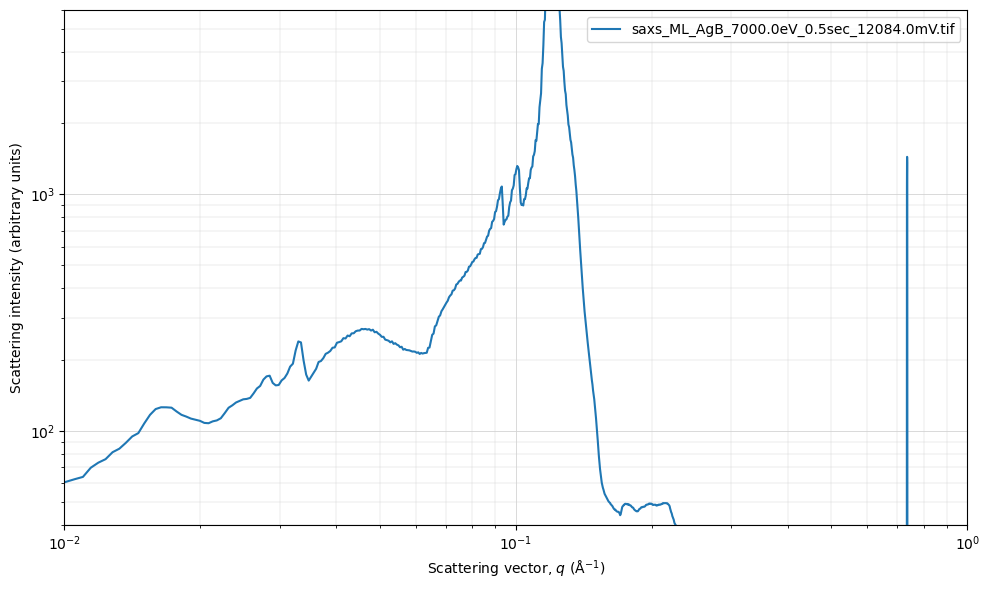

In [13]:
# Plot results
az_range = [-180, 180]
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(qvector, intensity, label=os.path.basename(image_path))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'Scattering vector, $q \ (\mathrm{\AA^{-1}})$')
ax.set_ylabel('Scattering intensity (arbitrary units)')
ax.grid(which='major', color='lightgrey', linewidth=0.6)
ax.grid(which='minor', color='lightgrey', linewidth=0.3)
ax.legend()

ax.set_xlim([0.01, 1])
ax.set_ylim([40, 6000])

plt.tight_layout()
plt.show()

In [11]:
print(qvector)



[2.24239197e-04 6.72717592e-04 1.12119599e-03 ... 8.95835594e-01
 8.96284072e-01 8.96732550e-01]


In [12]:
type(qvector)

numpy.ndarray

In [14]:
qvector.tolist()

[0.0002242391973799605,
 0.0006727175921398815,
 0.0011211959868998025,
 0.0015696743816597234,
 0.0020181527764196448,
 0.0024666311711795653,
 0.0029151095659394866,
 0.0033635879606994075,
 0.003812066355459329,
 0.00426054475021925,
 0.004709023144979171,
 0.005157501539739091,
 0.0056059799344990125,
 0.006054458329258934,
 0.006502936724018854,
 0.006951415118778776,
 0.007399893513538697,
 0.007848371908298618,
 0.00829685030305854,
 0.00874532869781846,
 0.00919380709257838,
 0.009642285487338302,
 0.010090763882098222,
 0.010539242276858143,
 0.010987720671618064,
 0.011436199066377986,
 0.011884677461137907,
 0.012333155855897827,
 0.012781634250657748,
 0.01323011264541767,
 0.01367859104017759,
 0.014127069434937512,
 0.014575547829697433,
 0.015024026224457355,
 0.015472504619217276,
 0.015920983013977198,
 0.01636946140873712,
 0.016817939803497037,
 0.017266418198256958,
 0.01771489659301688,
 0.0181633749877768,
 0.018611853382536722,
 0.019060331777296644,
 0.019508810